In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Cargado")

Cargado


Se crea un dataset que va a tener dos variables independientes precio y gasto en publicidad para el producto

In [110]:
precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
gasto = np.array([2000, 4801, 210, 10000, 6000, 503, 491, 4000, 9200, 1000, 1500, 1800, 3000])

reshape se usa porque scikit learn requiere que se le pase una matriz con ambas dimensiones definidas

In [111]:
print(precio.shape, "\n")

X = precio.reshape(-1, 1) # esto es necesario para transformar el vector en matriz

print(X.shape, "\n")

(13,) 

(13, 1) 



Se crea la variable dependiente ventas, que dice la cantidad de unidades vendidas para cada producto

Para esto se tiene que declarar los valores para una función lineal a partir de la cual se van a crear los números.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Estos son pendiente y ordenada

También se crea una media y una desviación estándar para agregar el ruido o error

In [112]:
pendiente, ordenada = -0.3, 100

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

# Se crean las 'y' a mano, como si fuese con la función matemática
# y = b₀ + b₁x + ϵ
y = np.dot(np.transpose(X), pendiente) + ordenada + epsilon
print("Redondear a enteros\n")
y = y.round()
print(y, "\n\n")

print("Dar vuelta la matriz con transpose\n")
y = np.transpose(y)
print(y, "\n\n")

print("X\n\n", X)

Redondear a enteros

[[101.  78.  79.  65.  94.  69.  94. 107.  92.  88.  40.  32.  78.]] 


Dar vuelta la matriz con transpose

[[101.]
 [ 78.]
 [ 79.]
 [ 65.]
 [ 94.]
 [ 69.]
 [ 94.]
 [107.]
 [ 92.]
 [ 88.]
 [ 40.]
 [ 32.]
 [ 78.]] 


X

 [[ 24]
 [ 30]
 [ 43]
 [101]
 [ 34]
 [ 94]
 [ 10]
 [ 15]
 [ 12]
 [ 44]
 [202]
 [156]
 [ 90]]


[ 10. 202.]
[97.  39.4]


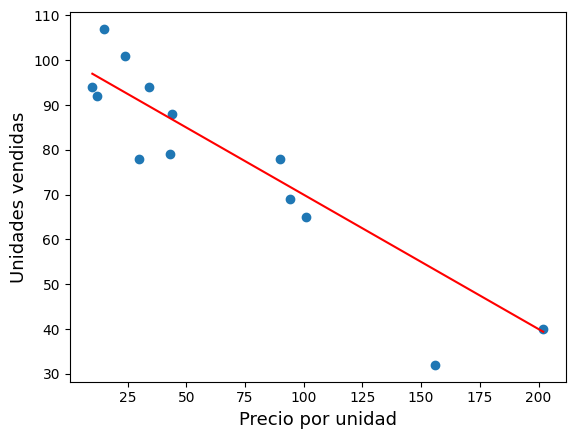

In [113]:
plt.scatter(X, y)
plt.ylabel('Unidades vendidas', fontsize=13, color='black')
plt.xlabel('Precio por unidad', fontsize=13, color='black')

rectaX = np.linspace(np.min(X), np.max(X), 2)
print(rectaX)
rectaY = pendiente * rectaX + ordenada
print(rectaY)

plt.plot(rectaX, rectaY, "-r")

Declara una función que toma los datos X e Y, y toma los parámetros b0 y b1 y devuelve la suma de errores

In [114]:
def error_cuadratico_medio(X,y,beta):
    error=0.0
    for n,val in enumerate(y):
        y_est = beta[0] + beta[1]*X[n]
        error = error + (y_est - y[n])**2
    return error/len(y)

Text(0.5, 0.5, 'beta1')

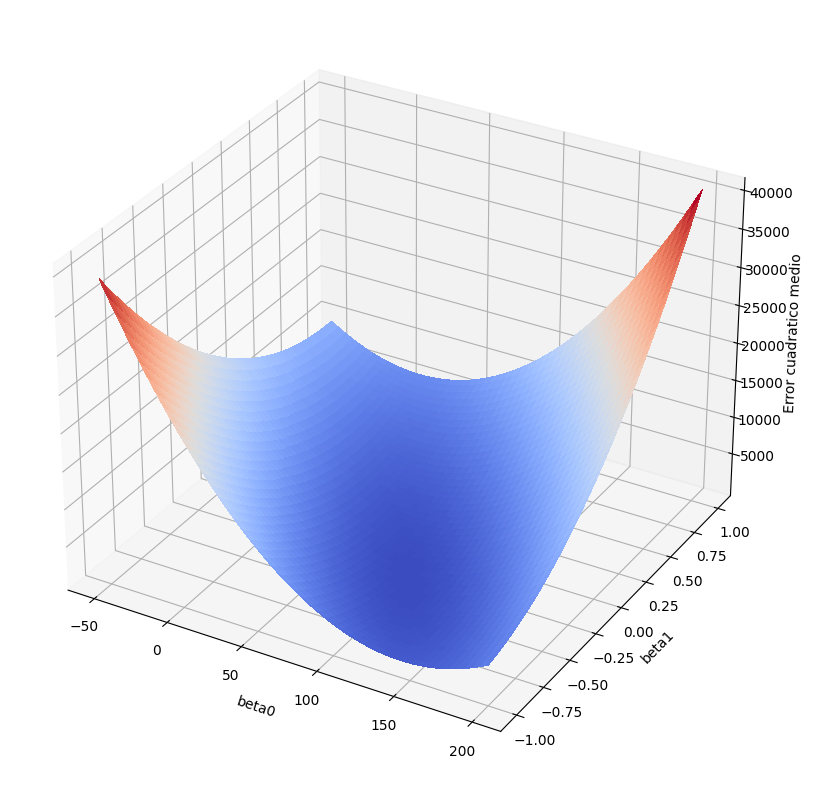

In [115]:
beta0 = np.arange(-50,200,0.25)
beta = np.arange(-1,1,0.01)
X0, Y0 = np.meshgrid(beta0, beta)

Z = error_cuadratico_medio(X,y,[X0,Y0])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('Error cuadratico medio')
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')

In [116]:
reg = LinearRegression()
reg.fit(X, y)

estimated = [reg.intercept_, reg.coef_]  # los parametros estimados
print(estimated)

R2 = reg.score(X,y) # R2
print(R2)

[array([101.0059524]), array([[-0.34628933]])]
0.8596825790851605


Graficar el scatter + la regresión lineal estimada + la real que sé que es la real porque son datos creados por mí mismo

(13, 1) (13, 1)


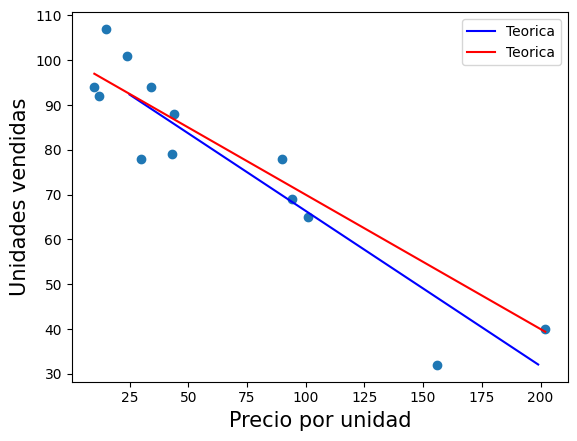

In [117]:
print(X.shape, y.shape)

plt.scatter(X, y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

x_var = np.arange( X.min(), X.max(), 0.001)
y_var = estimated[0] + x_var*estimated[1]
y_var_est = 100 + x_var*(-0.3)

#plt.plot(x_var,np.transpose(y_var),label="Estimado", color='b')
x = np.arange(25,200,1)
ypred = reg.predict(x.reshape(-1, 1))
plt.plot(x, ypred, label="Teorica", color='b')
plt.plot(x_var, np.transpose(y_var_est), label="Teorica", color='r')

plt.legend(loc='upper right')

Seaborn puede dibujar el área de confianza de una estimación, algo que no sabría hacer a mano con matplotlib

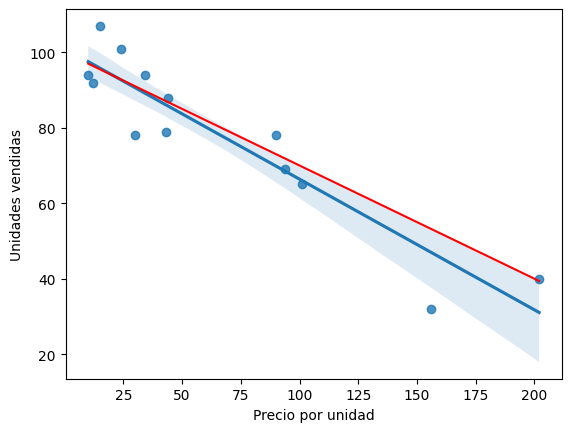

In [118]:
ax = sns.regplot(X, y, ci=80)
ax.set_xlabel('Precio por unidad')
ax.set_ylabel('Unidades vendidas')

plt.plot(x_var,np.transpose(y_var_est),label="Teorica", color='r')

Agregar 3 valores de nuevos y predecir según el precio (X) cuántas unidades venderían (y)

(13, 1) (13, 1)


Text(0.5, 0, 'Precio por unidad')

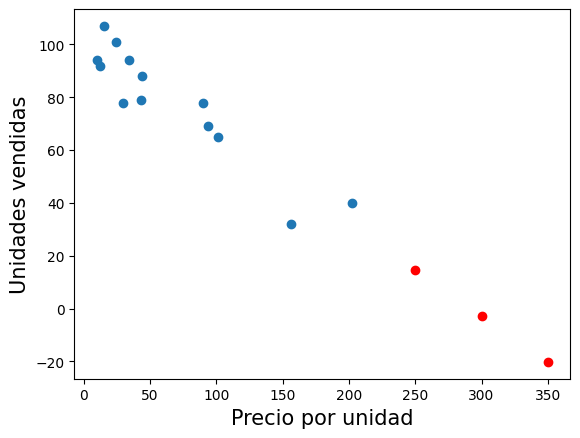

In [119]:
precios_nuevo = np.array([250, 300, 350])
X_nuevo = precios_nuevo.reshape(-1, 1) 
 
y_nuevo = reg.predict(X_nuevo)  # hago la prediccion para estos nuevos valores

print(X.shape, y.shape)
plt.scatter(X, y)
plt.scatter(X_nuevo,y_nuevo, color='r')

plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

Regresión usando dos variables independientes: el precio por unidad y el gasto de publicidad.

Primero crear una matriz que contenga ambas variables y luego simular los datos multiplicando cada fila por su coeficiente, y agregando ruido normalmente distribuido.

In [122]:
X = np.column_stack((precio,gasto))  # variables independientes
print("Shape -> ", X.shape)
beta = np.array([-0.3,0.1]) # parametros 
beta0 = 20  # 

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(X, beta)+ beta0 + epsilon).round()

Shape ->  (13, 2)


In [121]:
reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_[0], reg.coef_[1]]

print(estimated)

R2 = reg.score(X,y) # R2
print(R2)

[11.123236043564816, -0.25045251374857, 0.1006973335735015]
0.999165503902787
